<a href="https://colab.research.google.com/github/vinicius-pf/Imersao_Dados/blob/main/Notebook/Desafio_Final_Vinicius_PF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Desafio Final Imersão Dados -  Alura

##Introdução

###Sobre a Imersão Dados

A [Imersão Dados](https://www.alura.com.br/imersao-dados) da plataforma [Alura](https://www.alura.com.br/) foi um evento gratuito on-line, que ocorreu entre os dias 3 e 7 de maio do ano de 2021. Nele, foram ministradas 5 aulas com o intuito de  
>acelerar os conhecimentos em Ciência de Dados, utilizando tecnologias alinhadas ao mercado e desenvolvendo projetos com dados do mundo real.'

Durante as aulas do curso, foi utlizada uma base de dados disponibilizada pelo [Laboratory Innovation Science at Harvard](https://lish.harvard.edu/) na plataforma [Kaggle](https://www.kaggle.com/c/lish-moa/overview/description) como um desafio para "[...]melhorar os algorítimos de detecção de novas drogas baseado em suas atividades biológicas".

Ao longo do curso, foram aplicadas e desenvolvidas técnicas para aplicar o conhecimento de Data Science na área de Drug Discovery. Também foram propostos desafios diários onde, além de utilizar o que foi aprendido em aula, também era necessário pesquisas externas para sua conclusão.

Este é um projeto final, sendo preparado utilizando-se das técnicas e métodos aprendidos ao longo das aulas e de seus desafios, em conjunto com referências externas.

### Sobre o Projeto

O processo de descoberta de novas drogas, ou *Drug Discovery*, vem sofrendo uma grande mudança. Se antes os cientistas derivavam novas drogas de produtos naturais ou de remédios caseiros, sem entender muito bem os seus mecanismos biológicos, hoje se consegue focar nisso por entender os efeitos biologicos de cada doença. Esses mecanismos biológicos, desencadeados por moléculas, são conhecidos como *mechanism-of-action*(MoA)

Graças a novas tecnologias, é possível descobrir novas drogas, aplicando-as em células humanas e analisando a resposta dos MoA com algoritmos que procuram por padrões similiares em outras base de dados com MoA já conhecidos.




### Objetivos do Projeto

Utilizando-se da base de dados disponível para as aulas, assim como analisando alguns dados já apresentados, pretende-se desvendar alguns pontos:

* Quais as 10 drogas mais utilizadas?
* Quais as 10 drogas menos utilizadas?
* Quais das 10 drogas mais utilizadas ativaram mais de um MoA?
* Quais das 10 drogas menos utilizadas ativaram mais de um MoA?
* Qual a taxa de ativação de MoA nos dois grupos?
* As 10 drogas mais utilizadas tem uma taxa de ativação melhor que as 10 últimas?



## Análises do Projeto

### Importando bibliotecas

Aqui importamos as bibliotecas que serão usadas no projeto. As bibliotecas *pandas* e *numpy* auxiliam na análise e manuseio das variáveis nos bancos de dados. Já *seaborn* e *matplotlib.pyplot* auxiliam na fabricação, formatação e análise de gráficos. Por último, a biblioteca sklearn contém métodos para a aplicação de modelos de *Machine Learning*, caso seja necessário.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Manipulando os os dados

#### Importando os dados

Aqui é feita a importação dos bancos de dados que serão utilizados nas análises. 

O banco de dados chamado `dados` traz as informações experimentais de acordo com grupos gênicos e componentes celulares, além de informar o tempo entre coletas de informações, a quantidade de doses e qual o grupo de controle. Já a variável `dados_resultados` traz as informações dos MoA que foram ativados.

In [ ]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_dados_resultados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv(url_dados_resultados)

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Criando variáveis

Para analisar os dados e responder às perguntas propostas nas hipóteses, necessita-se criar algumas variáveis e novas colunas nos banco de dados.

In [ ]:
contagem_drogas = dados['droga'].value_counts()
contagem_drogas

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
122c63321       1
a6334fda8       1
68282e3fb       1
19b95658c       1
796f6988f       1
Name: droga, Length: 3289, dtype: int64

Com essa análise, vemos que o grupo `cacb2b860` é o mais populoso. Nos experimentos há dados de um grupo de controle. Caso esse código se refira ao grupo de controle, deve ser analisada a ação desse grupo de controle em relação a ativação ou nao dos MoA.

In [ ]:
#Descobrindo as 10 drogas mais utilizadas no projeto
drogas_top_10 = contagem_drogas.index[0:10]
drogas_top_10

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

In [ ]:
#Descobrindo as 10 drogas menos utilizadas no projeto
drogas_bottom_10 = contagem_drogas.tail(10)
drogas_bottom_10

dac782c74    1
828099693    1
c1292b6d8    1
aeb28b1ee    1
1502f8cbb    1
122c63321    1
a6334fda8    1
68282e3fb    1
19b95658c    1
796f6988f    1
Name: droga, dtype: int64

Ao utlizar o código para saber as 10 drogas menos utilizadas, percebemos que há várias drogas que são testadas apenas 1 vez. Podemos saber esse valor utilizando um laço `for`

In [ ]:
soh_uma_vez = 0

for i in range(len(contagem_drogas)):
    if contagem_drogas[i] == 1:
        soh_uma_vez +=1

soh_uma_vez

129

Com 129 drogas que foram analisadas apenas 1 vez, o programa para selecionar apenas 10 dessas drogas pode não ser confiável. Uma solução poderia ser definir 10 dessas drogas e analisá-las individualmente. Ao fazer isso, poderia ser excluída alguma droga que faria a ativação de algum MoA. A princípio serão consideraradas todas as 129 drogas, em vez apenas das 10 propostas no início.

In [ ]:
drogas_bottom = contagem_drogas.index[-129:]
drogas_bottom

Index(['58d311643', '81a463c0a', 'b36078dd2', 'd532d49de', '8bc88a3be',
       '98c4c858e', 'e6b7b845f', 'ef4e67d99', 'b6b4f212d', '67c4672f3',
       ...
       'dac782c74', '828099693', 'c1292b6d8', 'aeb28b1ee', '1502f8cbb',
       '122c63321', 'a6334fda8', '68282e3fb', '19b95658c', '796f6988f'],
      dtype='object', length=129)

#### Criando colunas novas

Para fazermos as anÁlises e responder as perguntas propostas, criamos algumas colunas novas. A primeira, chamada de `n_moa` contará a quantidade de MoA ativados para cada experimento.

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Para uma análise mais profunda, define-se 3 colunas novas, de acordo com a quantidade de MoA ativos para aquele experimento. Primeiro, a `ativo_1_moa` mostra se aquele experimento ativou algum MoA. Caso o experimento ative 3 MoA ou mais, a coluna `ativo_3_moa` mostrará isso. Para os casos em que o número de MoA ativos for maior que 5, existe a coluna `ativo_5_moa`

In [ ]:
dados_resultados['ativo_1_moa'] = (dados_resultados['n_moa']!=0)
dados_resultados['ativo_3_moa'] = (dados_resultados['n_moa'] > 2)
dados_resultados['ativo_5_moa'] = (dados_resultados['n_moa'] > 5)

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_1_moa,ativo_3_moa,ativo_5_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False


In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_1_moa,ativo_3_moa,ativo_5_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True,True,False
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True,False,False


#### Unindo os banco de dados

Como a base `dados` mostra a dosagem e o tempo de medição, e a base `dados_resultados` mostra as informações dos MoA, precisamos unir as bases para que possam ser feitas as analises desejadas das drogas. 

In [ ]:
dados_unidos = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_1_moa','ativo_3_moa', 'ativo_5_moa']], on = 'id')
dados_unidos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_1_moa,ativo_3_moa,ativo_5_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,False,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,False,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,True,False
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,False,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,False,False


Com a união, agora podemos analisar os dados das drogas mais e menos utilizadas. 

### Analise das drogas por MoA

#### Analisando por 1 MoA ativo

##### 10 Drogas Mais Utilizadas

Para responder a primeira pergunta, podemos utilizar as novas colunas criadas, em específico a `ativo_1_moa`. Para isso, usa-se o método query da plataforma Pandas. 

In [ ]:
top_10_ativo = dados_unidos.query('droga in @drogas_top_10 & ativo_1_moa == True')['droga'].value_counts()
top_10_ativo

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
d50f18348    186
d1b47f29d    178
67c879e79     19
83a9ea167     18
Name: droga, dtype: int64

In [ ]:
top_10_inativo = dados_unidos.query('droga in @drogas_top_10 & ativo_1_moa == False')['droga'].value_counts()
top_10_inativo

cacb2b860    1866
292ab2c28     194
Name: droga, dtype: int64

Ao analisar as 10 drogas mais utilizadas, se percebe que apenas 2 compostos não ativaram algum MoA. Como o código `cacb2b860` é o grupo de controle, podemos ignorar esse código nas próximoas analises. Para continuar utilizando 10 drogas nas análises, deve-se incluir o 11º composto no top 10. 

Nos dados disponíveis, a droga `292ab2c28` não ativou MoA, podendo se concluir que a droga não foi efetiva no combate das doenças pesquisadas.

In [ ]:
drogas_top_10 = contagem_drogas.index[1:11]
drogas_top_10

Index(['87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee', 'd08af5d4b',
       '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79', '83a9ea167'],
      dtype='object')

In [ ]:
top_10_ativo = dados_unidos.query('droga in @drogas_top_10 & ativo_1_moa == True')['droga'].value_counts()
top_10_ativo

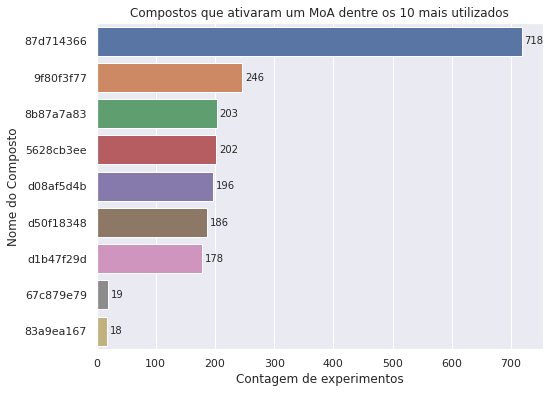

In [ ]:
cod_composto = top_10_ativo.index[:]

fig = plt.figure(figsize=(8,6))


ax = sns.countplot(y = 'droga', data = dados_unidos.query('droga in @cod_composto'), order = cod_composto)

ax.set_title("Compostos que ativaram um MoA dentre os 10 mais utilizados")
ax.set_xlabel('Contagem de experimentos')
ax.set_ylabel('Nome do Composto')

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 5, p.get_y() + p.get_height() / 2, '{}'.format(width),  ha = 'left',   va = 'center')  

plt.show()

In [ ]:
top_10_inativo = dados_unidos.query('droga in @drogas_top_10 & ativo_1_moa == False')['droga'].value_counts()
top_10_inativo

292ab2c28    194
Name: droga, dtype: int64

In [ ]:
taxa_top_10_ativo = dados_unidos.query('droga in @drogas_top_10')['ativo_1_moa'].value_counts(normalize = True)
taxa_top_10_ativo

True     0.910185
False    0.089815
Name: ativo_1_moa, dtype: float64

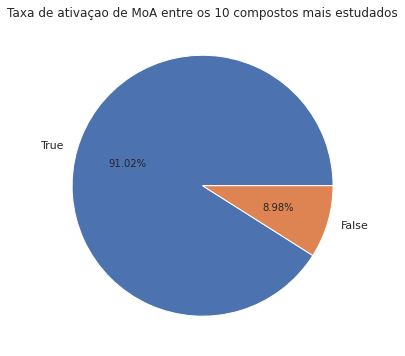

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = taxa_top_10_ativo.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa de ativaçao de MoA entre os 10 compostos mais estudados")
ax.set_ylabel("")

plt.show()

Com essas análises, é possível perceber que a grande maioria dos 10 compostos mais utilizados ativou ao menos um MoA. Desses, pode-se ter drogas novas, ou alguns podem já ser drogas disponíveis, às quais busca-se descobrir novos usos.

##### Drogas menos utilizadas

In [ ]:
bottom_ativo = dados_unidos.query('droga in @drogas_bottom & ativo_1_moa == True')['droga'].value_counts()
bottom_ativo.head()

f49a73cd5    1
b2fe3eca7    1
122c63321    1
7226e2204    1
547f80a41    1
Name: droga, dtype: int64

In [ ]:
bottom_inativo = dados_unidos.query('droga in @drogas_bottom & ativo_1_moa == False')['droga'].value_counts()
bottom_inativo.head()

c0521523c    1
0dedfb162    1
a9bc2c549    1
07cca32e8    1
d70cdde82    1
Name: droga, dtype: int64

In [ ]:
taxa_bottom_ativo = dados_unidos.query('droga in @drogas_bottom')['ativo_1_moa'].value_counts(normalize = True)
taxa_bottom_ativo

True     0.643411
False    0.356589
Name: ativo_1_moa, dtype: float64

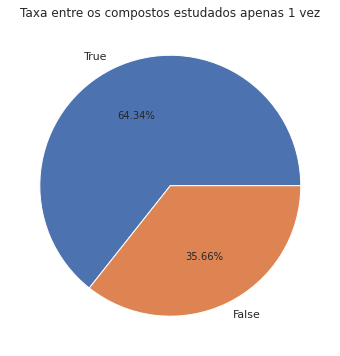

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = taxa_bottom_ativo.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa entre os compostos estudados apenas 1 vez")
ax.set_ylabel("")

plt.show()

Com essas análises rápidas, percebe-se que dentre os compostos estudados apenas 1 vez, obteve-se uma taxa de ativação de MoA boa. Os compostos que ativaram algum MoA podem agora ser estudados mais profundamente, seja com mais experimentos ou na descoberta de quais MoA foram ativados. 

#### Analisando por 3 MoA ativo

##### 10 Drogas Mais Utilizadas

Assim como na analise de 1 MoA ativo, usa-se a coluna a `ativo_3_moa` para saber se alguma das 10 drogas mais utilizadas ativa mais de 3 MoA.

In [ ]:
top_10_ativo = dados_unidos.query('droga in @drogas_top_10 & ativo_3_moa == True')['droga'].value_counts()
top_10_ativo

d50f18348    186
Name: droga, dtype: int64

In [ ]:
top_10_inativo = dados_unidos.query('droga in @drogas_top_10 & ativo_3_moa == False')['droga'].value_counts()
top_10_inativo

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
292ab2c28    194
d1b47f29d    178
67c879e79     19
83a9ea167     18
Name: droga, dtype: int64

In [ ]:
taxa_top_10_ativo = dados_unidos.query('droga in @drogas_top_10')['ativo_3_moa'].value_counts(normalize = True)
taxa_top_10_ativo

False    0.913889
True     0.086111
Name: ativo_3_moa, dtype: float64

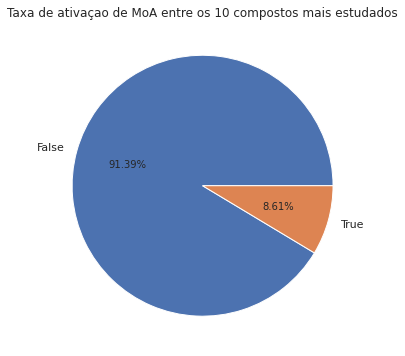

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = taxa_top_10_ativo.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa de ativaçao de MoA entre os 10 compostos mais estudados")
ax.set_ylabel("")

plt.show()

Com essas análises, percebe-se que apenas 1 das drogas ativou 3 ou mais MoA. A droga de código `87d714366` não ativou mais de 3 MoA. Ela é a droga mais estudada, quando o grupo de controle é excluído da classificação, assim pode-se imaginar que o número de MoA ativados pode não ser importante na análise, mas apenas qual o MoA foi ativo.  

##### Drogas menos utilizadas

In [ ]:
bottom_ativo = dados_unidos.query('droga in @drogas_bottom & ativo_3_moa == True')['droga'].value_counts()
bottom_ativo.head()

ed81f4046    1
fb8a93a83    1
809527b9d    1
Name: droga, dtype: int64

In [ ]:
bottom_inativo = dados_unidos.query('droga in @drogas_bottom & ativo_3_moa == False')['droga'].value_counts()
bottom_inativo.head()

c0521523c    1
e3e768009    1
f5c443039    1
7226e2204    1
07cca32e8    1
Name: droga, dtype: int64

Por conta da quantidade de códigos distintas e a mesma contagem, não irei apresentar um gráfico de barras como na seção das 10 drogas mais utilizada, apenas mostrando o pie chart das proporções.

In [ ]:
taxa_bottom_ativo = dados_unidos.query('droga in @drogas_bottom')['ativo_3_moa'].value_counts(normalize = True)
taxa_bottom_ativo

False    0.976744
True     0.023256
Name: ativo_3_moa, dtype: float64

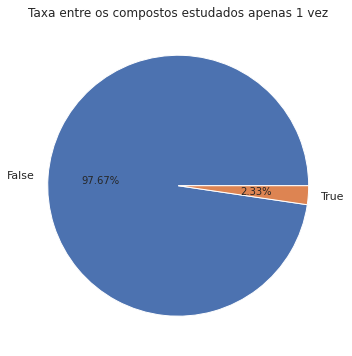

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = taxa_bottom_ativo.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa entre os compostos estudados apenas 1 vez")
ax.set_ylabel("")

plt.show()

Novamente percebe-se que os compostos que ativam mais de 3 MoA são raros neste estudo. Apenas 3 dentre os que foram testados uma vez apresentam essa característica. 

Apesar de os dados serem interessantes, eles não correspondem ao total da base de dados, já que foram utilizados dois recortes escolhidos pelo autor. Apesar disso, podemos usar algumas dessas análises para entender o comportamento diante da totalidade dos dados.

### Comparando o banco de dados inteiro

#### Se algum MoA foi ativo

Com as informações analisadas dentre as 10 drogas mais utilizadas e os compostos estudados apenas 1uma vez, podemos comparar o resultado deles no banco de dados inteiro.

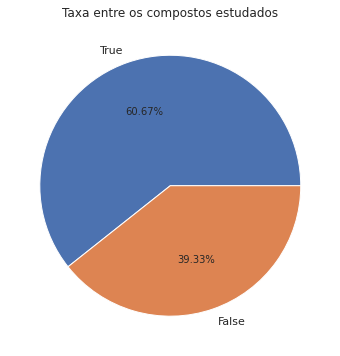

In [ ]:
fig = plt.figure(figsize=(8,6))
taxa_total = dados_unidos['ativo_1_moa'].value_counts(normalize = True)

ax = taxa_total.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa entre os compostos estudados")
ax.set_ylabel("")

plt.show()

Esse gráfico mostra que a taxa de ativação de MoA entre as dez drogas mais utilizadas é muito maior que a taxa do banco de dados original. A diferença pode estar em termos utilizado dados do grupo de controle, que tem o `ativo_1_moa` como falso. 

Uma outra análise pode ser feita excluindo o grupo de controle.

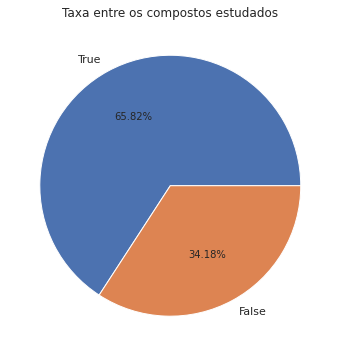

In [ ]:
fig = plt.figure(figsize=(8,6))

contagem_sem_controle = contagem_drogas.index[1:]

taxa_total = dados_unidos.query('droga in @contagem_sem_controle')['ativo_1_moa'].value_counts(normalize = True)

ax = taxa_total.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa entre os compostos estudados")
ax.set_ylabel("")

plt.show()

Com essa análise, percebe-se que o grupo de controle, apesar de ser numeroso, não alterou significamente a taxa de ativação ou não de MoA na primeira análise das drogas.

#### Se mais do que 2 MoA foram ativado

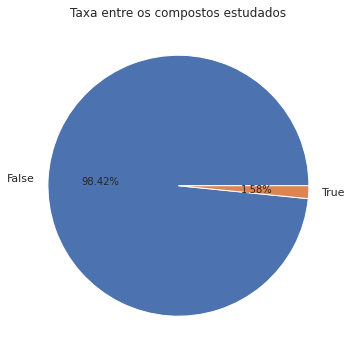

In [ ]:
fig = plt.figure(figsize=(8,6))
taxa_total = dados_unidos['ativo_3_moa'].value_counts(normalize = True)

ax = taxa_total.plot.pie(autopct='%1.2f%%')
ax.set_title("Taxa entre os compostos estudados")
ax.set_ylabel("")

plt.show()

Comparando com os valores já estudados, percebe-se uma taxa relacionada entre os cortes e o resto dos dados. Isso pode ter a v com a quantidade de compostos que ativa apenas um MoA específico, enquanto poucos compostos ativam mais de 3 MoA. Nesta analise não foi tirado o grupo de controle, afinal ele não modificou os resultados na analise onde apenas 1 MoA foi ativado ou não.

## Conclusões das Analises

Atualmente há uma necessidade crescente de analistas de dados em diversos ramos. Um deles é na análise de compostos e descobertas de novas drogas. Esse projeto deseja ser o ponto de início para análises mais profundas em determinados compostos. 

Ao se analisar as 10 drogas mais utilizadas, se descobriu o grupo de controle do experimento, que foi ignorado em analises futuras. Analisando-as mais a fundo, descobriu-se que 8 das 10 drogas ativaram apenas um MoA, enquanto 1 ativou 3 ou mais e 1 não ativou nenhum MoA. Notou-se também que a taxa de ativação de MoA entre as drogas mais utilizadas é maior que a taxa de ativação global, mesmo quando se exclue da analise o grupo de controle.

Como a ativação de MoA é o foco do estudo, as drogas que não tiveram MoA ativos podem ser excluidas de estudos posteriores. Dentre essas drogas, a `292ab2c28` se destaca por ser uma das 10 mais estudadas e que não ativou nenhum MoA. O fato dela ser muito estudada mostra a expectativa pelo resultado positivo em estudos clínicos.

Dentre as menos utilizadas, 129 foram utilizadas apenas 1 vez no experimento. Os compostos que tiveram sucesso nesse grupo podem ser estudados com mais afinco, com mais informações a respeito de doses e tempo de coleta. 

Apesar das descobertas feitas pelas análises, ainda se sabe pouco. Há alguns estudos para serem feitos como qual o MoA que as drogas mais utilizadas no experimento ativaram ou se o tempo ou a dose mudaram o MoA ativado, mas mantendo o número de MoA ativado.



## Referências 

1. [Expressão gênica: o caminho da informação biológica](https://docs.google.com/document/d/1-TUSrhp9srIKIBiElPniCGiyHonPzFG4WDWYXCGXBo4/edit?copiedFromTrash)

2. [Drug discovery: passado, presente e futuro](https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit)

3. [Mechanisms of Action (MoA) Prediction](https://www.kaggle.com/c/lish-moa/overview/description)

4. [Seaborn Documentation](https://seaborn.pydata.org/index.html)

5. [Pandas Documentation](https://pandas.pydata.org/docs/reference/index.html#api)


## Sobre o autor:


Nome: Vinicius Pereira Fernandes

E-mail: vinicius.pf99@live.com

Linkedin: https://www.linkedin.com/in/viniciuspf/

GitHub: https://github.com/vinicius-pf